# Constant tensors and variables.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x = tf.ones((2,3))
print(x)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [ ]:
x = tf.eye(2,3)
print(x)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]], shape=(2, 3), dtype=float32)


In [ ]:
x = tf.random.normal((2,3))
print(x)

tf.Tensor(
[[-0.83947265 -0.991643   -0.15605308]
 [-0.6699415  -0.35897702 -0.9102111 ]], shape=(2, 3), dtype=float32)


In [ ]:
x = tf.random.uniform((2,3),minval=-1,maxval=1)
print(x)

tf.Tensor(
[[-0.37406325  0.27041984 -0.91739774]
 [ 0.3316865  -0.12715101 -0.950758  ]], shape=(2, 3), dtype=float32)


**A significant difference between NumPy arrays and TensorFlow tensors is that TensorFlow tensors aren’t assignable: they’re constant. For instance, in NumPy, you can do
the following.**

In [ ]:
x = np.ones((2,1))
x

array([[1.],
       [1.]])

In [ ]:
x[0,0] =0

In [ ]:
x

array([[0.],
       [1.]])

In [ ]:
x = tf.ones((2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [ ]:
# x[0,0] = 0 will give type error

**To train a model, we’ll need to update its state, which is a set of tensors. If tensors
aren’t assignable, how do we do it? That’s where variables come in. tf.Variable is the
class meant to manage modifiable state in TensorFlow.**

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value = tf.random.normal((3,2)))

In [ ]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.4996406 , -0.6395351 ],
       [-0.2575096 , -1.2196172 ],
       [ 1.4159148 ,  0.34798637]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3,2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0,0].assign(4)

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[4., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

**Similarly, assign_add() and assign_sub() are efficient equivalents of += and -=**

In [ ]:
v.assign_add(tf.ones((3,2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[5., 2.],
       [2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
v.assign_sub(tf.ones((3,2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[4., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

# Tensor operations: Doing math in TensorFlow.

**A few basic math operations.**

In [ ]:
a = tf.Variable(tf.ones((3,4)))

In [ ]:
b = tf.transpose(a.assign_add(tf.ones((3,4))))

In [ ]:
tf.square(a)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]], dtype=float32)>

In [ ]:
print(b)

tf.Tensor(
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]], shape=(4, 3), dtype=float32)


In [ ]:
a ** 3

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[8., 8., 8., 8.],
       [8., 8., 8., 8.],
       [8., 8., 8., 8.]], dtype=float32)>

In [ ]:
tf.sqrt(a)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1.4142135, 1.4142135, 1.4142135, 1.4142135],
       [1.4142135, 1.4142135, 1.4142135, 1.4142135],
       [1.4142135, 1.4142135, 1.4142135, 1.4142135]], dtype=float32)>

In [ ]:
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[16., 16., 16.],
       [16., 16., 16.],
       [16., 16., 16.]], dtype=float32)>

# Using the GradientTape.

In [ ]:
input_var = tf.Variable(initial_value = 4.)

In [ ]:
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

**Using GradientTape with constant tensor inputs.**

In [ ]:
input_const = tf.constant(3.)

In [ ]:
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result,input_const)


**Using nested gradient tapes to compute second-order gradients.**

In [ ]:
time  =  tf.Variable(3.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position,time)
acceleration  = outer_tape.gradient(speed, time)
print(speed,acceleration)

tf.Tensor(29.400002, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


# An end-to-end example: A linear classifier in pure TensorFlow.

In a machine learning job interview, you may be asked to implement a linear classifier from scratch in TensorFlow: a very simple task that serves as a filter between candidates who have some minimal machine learning background and those who don’t.

**Generating two classes of random points in a 2D plane.**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0,3],cov = [[1,0.5],[0.5,1]],size  = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3,0],cov = [[1,0.5],[0.5,1]],size  = num_samples_per_class)

In [ ]:
negative_samples.shape

(1000, 2)

**Stacking the two classes into an array with shape (2000, 2).**

In [ ]:
inputs  = np.vstack((negative_samples,positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1).**

In [ ]:
targets  = np.vstack((np.zeros((num_samples_per_class,1),dtype = np.float32),np.ones((num_samples_per_class,1),dtype = np.float32)))

In [ ]:
targets.shape

(2000, 1)

In [ ]:
targets.dtype

dtype('float32')

**Plotting the two point classes**

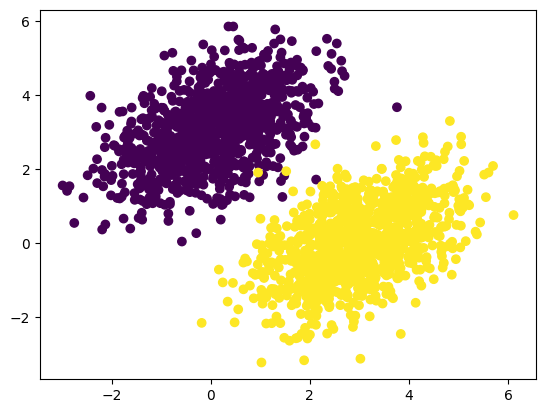

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1],c = targets)

**Now let’s create a linear classifier that can learn to separate these two blobs. A linear
classifier is an affine transformation (prediction = W • input + b) trained to minimize
the square of the difference between predictions and the targets.**

**Creating the linear classifier variables.**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape = (output_dim,)))

**The forward pass function.**

In [ ]:
def model(inputs):
  return tf.matmul(inputs,W) + b

**The mean squared error loss function.**

In [ ]:
def square_loss(inputs,predictions):
  per_sample_losses  = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.01
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions  = model(inputs)
    loss = square_loss(targets,predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

**The batch training loop.**

In [ ]:
for step in range(40):
  loss = training_step(inputs,targets)
  # print(f"loss at step {step} is {loss}")

In [ ]:
predictions = model(inputs)

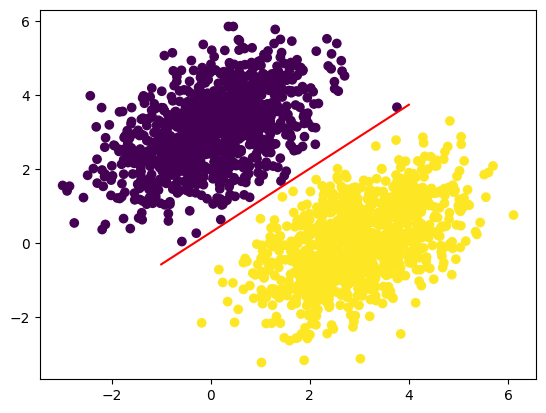

In [ ]:
x = np.linspace(-1,4,1000)
y = -W[0] / W[1] * x + (0.5 - b)/ W[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0], inputs[:,1],c=predictions > 0.5)